# Bayesian Sign Test

Module `signtest` in `bayesiantests` computes the probabilities that, based on the measured performance, one model is better than another or vice versa or they are within the region of practical equivalence.

This notebook demonstrates the use of the module.


We will load the classification accuracies of the naive Bayesian classifier and AODE on 54 UCI datasets from the file `Data/accuracy_nbc_aode.csv`. For simplicity, we will skip the header row and the column with data set names.

In [3]:
import numpy as np
scores = np.loadtxt('Data/accuracy_nbc_aode.csv', delimiter=',', skiprows=1, usecols=(1, 2))
names = ("NBC", "AODE")

Functions in the module accept the following arguments.

- `x`: a 2-d array with scores of two models (each row corresponding to a data set) or a vector of differences.
- `rope`: the region of practical equivalence. We consider two classifiers equivalent if the difference in their performance is smaller than `rope`. 
- `prior_strength`: the prior strength for the Dirichlet distribution. Default is 1.
- `prior_place`: the region into which the prior is placed. Default is `bayesiantests.ROPE`, the other options are `bayesiantests.LEFT` and `bayesiantests.RIGHT`.
- `nsamples`: the number of Monte Carlo samples used to approximate the posterior.
- `names`: the names of the two classifiers; if `x` is a vector of differences, positive values mean that the second (right) model had a higher score.

### Summarizing probabilities

Function `signtest(x, rope, prior_strength=1, prior_place=ROPE, nsamples=50000, verbose=False, names=('C1', 'C2'))` computes the Bayesian sign test and returns the probabilities that the difference (the score of the first classifier minus the score of the first) is negative, within rope or positive.

In [10]:
import bayesiantests as bt
left, within, right = bt.signtest(scores, rope=0.01)
print(left, within, right)

0.0 0.71288 0.28712


The first value (`left`) is the probability that the first classifier (the left column of `x`) has a higher score than the second (or that the differences are negative, if `x` is given as a vector).

In the above case, the right (AODE) performs worse than naive Bayes with a probability of 0.29, and they are practically equivalent with a probability of 0.71.

If we add arguments `verbose` and `names`, the function also prints out the probabilities.

In [11]:
left, within, right = bt.signtest(scores, rope=0.01, verbose=True, names=names)

P(NBC > AODE) = 0.0, P(rope) = 0.70982, P(AODE > NBC) = 0.29018


The posterior distribution can be plotted out:
1. using the function `signtest_MC(x, rope, prior_strength=1, prior_place=ROPE, nsamples=50000)` we generate the samples of the posterior
2. using the function `plot_posterior(samples,names=('C1', 'C2'))` we then plot the posterior in the probability simplex

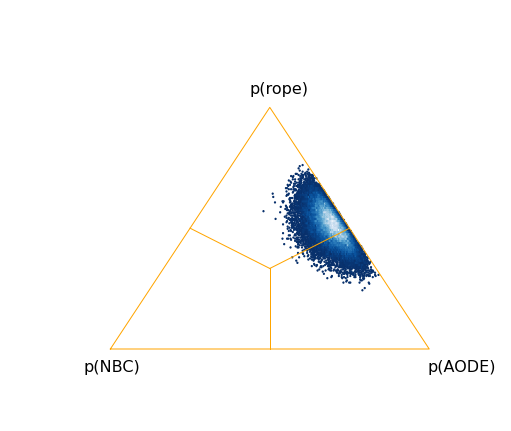

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

samples = bt.signtest_MC(scores, rope=0.01)

fig = bt.plot_posterior(samples,names)

plt.show()

### Checking sensitivity to the prior

To check the effect of the prior, let us a put a greater prior on the left.

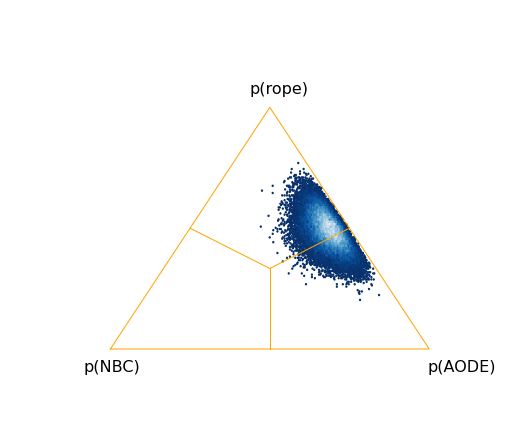

In [13]:
samples = bt.signtest_MC(scores, rope=0.01,  prior_strength=1, prior_place=bt.LEFT)
fig = bt.plot_posterior(samples,names)
plt.show()

... and on the right

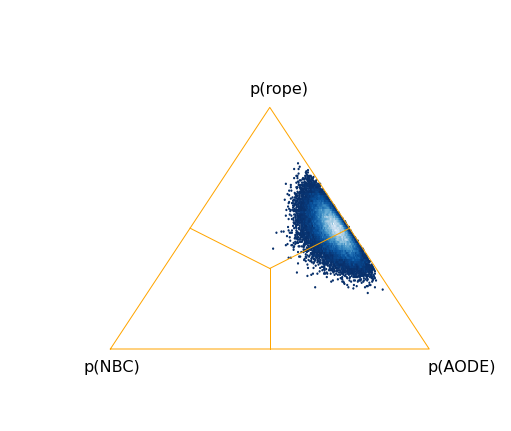

In [14]:
samples = bt.signtest_MC(scores, rope=0.01,  prior_strength=1, prior_place=bt.RIGHT)
fig = bt.plot_posterior(samples,names)
plt.show()

The prior with a strength of `1` has negligible effect. Only a much stronger prior on the left would shift the probabilities toward NBC:

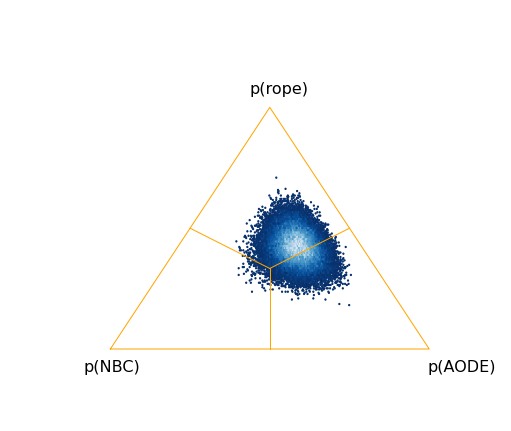

In [15]:
samples = bt.signtest_MC(scores, rope=0.01,  prior_strength=10, prior_place=bt.LEFT)
fig = bt.plot_posterior(samples,names)
plt.show()

## Auxiliary functions


The function `signtest_MC(x, rope, prior_strength=1, prior_place=ROPE, nsamples=50000)` computes the posterior for the given input parameters. The result is returned as a 2d-array with `nsamples` rows and three columns representing the probabilities $p(-\infty, `rope`), p[-`rope`, `rope`], p(`rope`, \infty)$. Call `signtest_MC` directly to obtain a sample of the posterior.

The posterior is plotted by `plot_simplex(points, names=('C1', 'C2'))`, where `points` is a sample returned by `signtest_MC`.

## References


`@ARTICLE{bayesiantests2016,
   author = {{Benavoli}, A. and {Corani}, G. and {Demsar}, J. and {Zaffalon}, M.},
   title = "{Time for a change: a tutorial for comparing multiple classifiers through Bayesian analysis}",
   journal = {ArXiv e-prints},
   archivePrefix = "arXiv",
   eprint = {1606.04316},
   url={https://arxiv.org/abs/1606.04316},
   year = 2016,
   month = jun
}`